# AI Lab 10 - Supervised & Unsupervised Learning
Saad Bin Khalid<br>
20K-0161<br>
BSCS-6F

## **Task 1:** &emsp;  Linear Regression

Refer to the advertising dataset on Kaggle. You are supposed to run a linear
regression with Sales as the dependent variable and TV as independent
variable. You are required to perform a train/test split of 70-30 and run the
linear regression through the stats-model library.

In [4]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

The kaggle dataset was downloaded and uploaded on this colab runtime. The dataset is available at https://www.kaggle.com/datasets/bumba5341/advertisingcsv?resource=download

In [46]:
df = pd.read_csv('kaggle_ads.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Drawing a scatter plot with sales as dependent and TV as independent variables

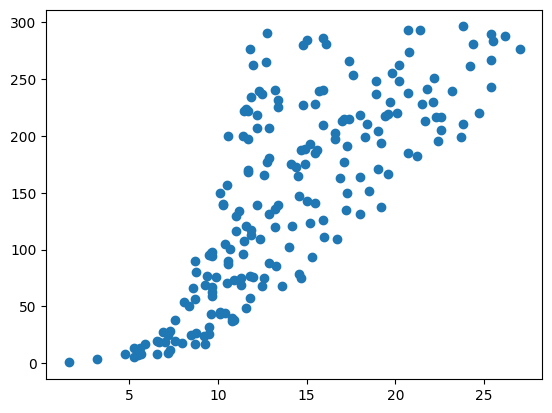

In [47]:
dependent, independent = 'Sales', 'TV'
fig, ax = plt.subplots()
ax.scatter(x=df[dependent], y=df[independent])

Split data into training and testing sets by 70-30 division

In [49]:
train, test = 70, 30  # in percent
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=test/100)

lin = LinearRegression()
lin.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred = lin.predict(x_test)
r2_score(y_test, y_pred)

0.8621248894184086

In [51]:
lin.coef_

array([-0.00213641,  0.04381151,  0.2000776 ,  0.00108184])

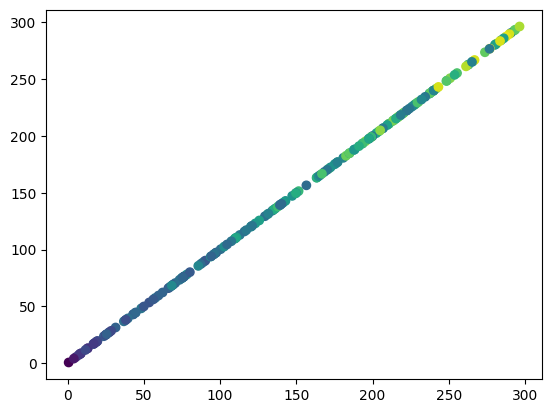

In [52]:
fig, ax = plt.subplots()
ax.scatter(x=x[independent], y=x[independent], c=df[dependent])

## **Task 2:** &emsp;  Decision Tree

Refer to the Iris dataset. You are required to predict the target variable on the basis of the features of the independent variables. Refer to the following
values for sepal length, sepal width, petal length and petal width:

* [3,4,5,2]
* [5,4,2,2]
* [7,1,2,4]
* [2,4,8,1]

In [28]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
df = load_iris()
classes = df.target_names
print('classes: ', classes)

classes:  ['setosa' 'versicolor' 'virginica']


In [36]:
test = 20 / 100
x = df.data
y = df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = test)

In [37]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
inputs = np.array([
    [3,4,5,2],
    [5,4,2,2],
    [7,1,2,4],
    [2,4,8,1]
])
predictions = clf.predict(inputs)

for item in predictions:
    print(classes[item])

Verginica
Setosa
Setosa
Verginica


## **Task 3:** &emsp;  Confusion Matrix

Refer to the diabetes dataset on Kaggle. You are required to run a decision
tress classifier on the dataset and calculate accuracy and plot the confusion
matrix.

In [44]:
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

The kaggle dataset was downloaded and uploaded on this colab runtime. The dataset is available at https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [56]:
df = pd.read_csv('kaggle_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
x = df.drop(['Outcome'], axis=1)
y = df.Outcome
test = 20/100
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test, random_state=1)

In [68]:
model = DecisionTreeClassifier()
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [73]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy *= 100
accuracy = round(accuracy, 2)
print(f"Accuracy: {accuracy}%")

Accuracy: 68.83%


In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[77 22]
 [26 29]]
